## **Изравняване на хистограма**

С тази програма може да се направи **изравняване на хистограма**


In [8]:
import matplotlib.pyplot as plt

### Стъпка 1: 8 на 8 greyscale изображение

Ще представим нашето изображение като 8 на 8 масив,  
където всяка стойност на интензитет на пиксел е между **0 и 255**


In [9]:
image1 = [
    [52, 55, 61, 59, 79, 61, 76, 61],
    [62, 59, 55, 104, 94, 85, 59, 71],
    [63, 65, 66, 113, 144, 104, 63, 72],
    [64, 70, 70, 126, 154, 109, 71, 69],
    [67, 73, 68, 106, 122, 88, 68, 68],
    [68, 79, 60, 70, 77, 66, 58, 75],
    [69, 85, 64, 58, 55, 61, 65, 83],
    [70, 87, 69, 68, 65, 73, 78, 90]
]

# Изображение 2 - с нисък контраст(стойностите са струпани в средата)
image2 = [
    [110, 112, 113, 115, 118, 116, 114, 113],
    [111, 113, 114, 116, 117, 118, 115, 114],
    [112, 113, 114, 115, 116, 117, 118, 117],
    [113, 114, 115, 116, 117, 118, 118, 117],
    [114, 115, 116, 117, 118, 117, 116, 115],
    [115, 116, 117, 118, 117, 116, 115, 114],
    [116, 117, 118, 117, 116, 115, 114, 113],
    [117, 118, 117, 116, 115, 114, 113, 112]
]


### Стъпка 2: Изчисляване на хистограма

Ще преброим колко пиксела имат всяка възможна стойност на интензитет (0–255).


In [10]:
def compute_histogram(img):
    hist = [0] * 256  # 256 за стойности на интезитет от 0 до 255
    for row in img:
        for pixel in row:
            hist[pixel] += 1
    return hist


### Стъпка 3: Кумулативна хистограма (CDF)

Кумулативната функция на разпределение (CDF) сумира стойностите на хистограмата
от 0 до всяка стойност на интензитета. Показва колко пиксела са по-малко или равни на дадена стойност.


In [11]:
def cumulative_histogram(hist):
    cdf = [0] * len(hist)
    cumulative = 0
    for i in range(len(hist)):
        cumulative += hist[i]
        cdf[i] = cumulative
    return cdf



### Стъпка 4: Прилагане на хистограмно изравняване

Разпределяме отново стойностите на пикселите, за да обхванат по-равномерно диапазона (0–255).

Формула:
new = round((CDF(C) - CDFmin) / (N - CDFmin) * 255)

In [12]:
def equalize_image(img, cdf):
    # Намерете най-малката ненулева стойност на CDF
    cdf_min = min(v for v in cdf if v > 0)
    total_pixels = len(img) * len(img[0])

    # Създаваме таблица за преобразуване на новите стойности
    new_values = [0] * 256
    for i in range(256):
        new_values[i] = round((cdf[i] - cdf_min) / (total_pixels - cdf_min) * 255)
        if new_values[i] < 0:
            new_values[i] = 0

    # Прилагаме новото преобразуване върху изображението
    new_img = []
    for row in img:
        new_row = [new_values[p] for p in row]
        new_img.append(new_row)
    return new_img, new_values


### Стъпка 5: Изчисляване на хистограма на изравненото изображение 

Повторно изчисляваме хистограмата, за да видим как разпределението на пикселите се е променило.


In [13]:
# обработка на изображение 1
hist1 = compute_histogram(image1)
cdf1 = cumulative_histogram(hist1)
equalized1, _ = equalize_image(image1, cdf1)
hist1_eq = compute_histogram(equalized1)

# обработка на изображение 2
hist2 = compute_histogram(image2)
cdf2 = cumulative_histogram(hist2)
equalized2, _ = equalize_image(image2, cdf2)
hist2_eq = compute_histogram(equalized2)


### Стъпка 6: Визуализация на резултатите с Matplotlib

Ще покажем:
- Оригинални и изравнени изображения (като 8×8 сиви матрици)
- Хистограми преди и след изравняване

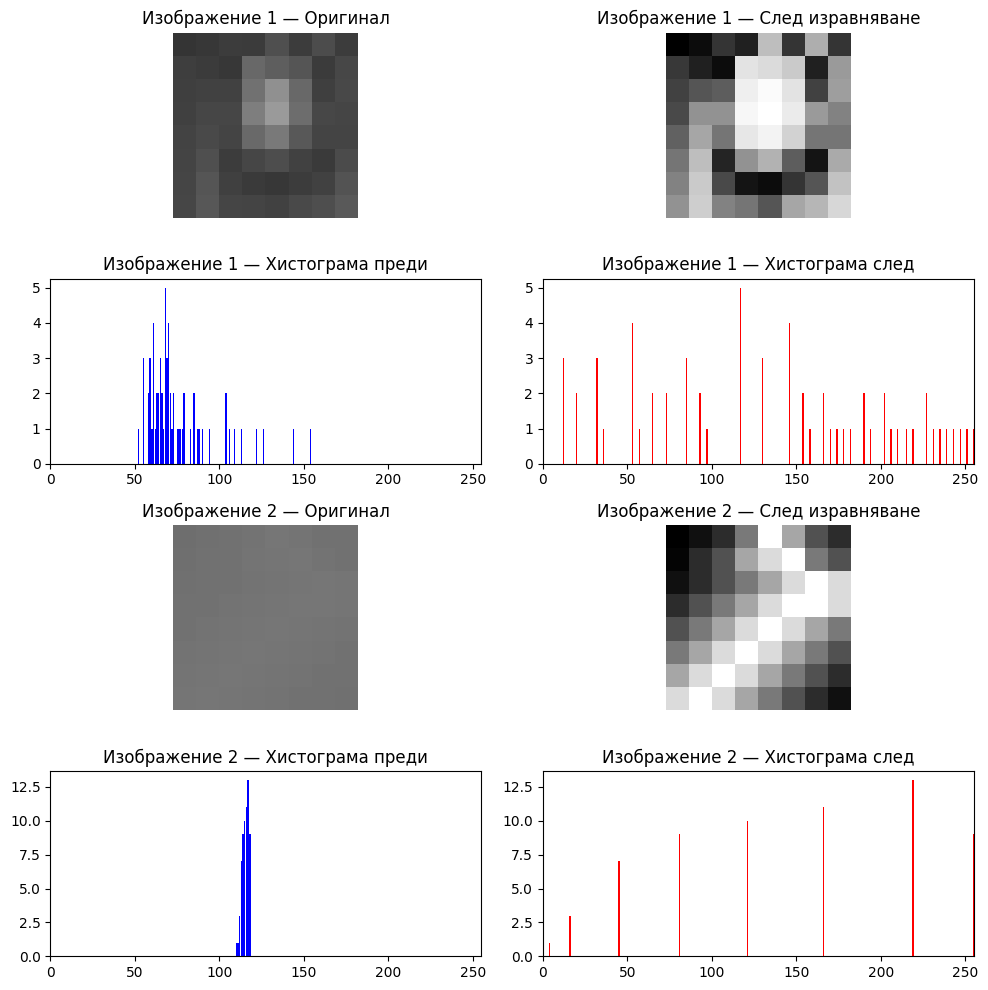

In [14]:
fig, axes = plt.subplots(4, 2, figsize=(10, 10))

# Резултати за изображение 1
axes[0, 0].imshow(image1, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title("Изображение 1 — Оригинал")
axes[0, 0].axis('off')

axes[0, 1].imshow(equalized1, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title("Изображение 1 — След изравняване")
axes[0, 1].axis('off')

axes[1, 0].bar(range(256), hist1, color='blue')
axes[1, 0].set_title("Изображение 1 — Хистограма преди")
axes[1, 0].set_xlim(0, 255)

axes[1, 1].bar(range(256), hist1_eq, color='red')
axes[1, 1].set_title("Изображение 1 — Хистограма след")
axes[1, 1].set_xlim(0, 255)

# Резултати за изображение 2
axes[2, 0].imshow(image2, cmap='gray', vmin=0, vmax=255)
axes[2, 0].set_title("Изображение 2 — Оригинал")
axes[2, 0].axis('off')

axes[2, 1].imshow(equalized2, cmap='gray', vmin=0, vmax=255)
axes[2, 1].set_title("Изображение 2 — След изравняване")
axes[2, 1].axis('off')

axes[3, 0].bar(range(256), hist2, color='blue')
axes[3, 0].set_title("Изображение 2 — Хистограма преди")
axes[3, 0].set_xlim(0, 255)

axes[3, 1].bar(range(256), hist2_eq, color='red')
axes[3, 1].set_title("Изображение 2 — Хистограма след")
axes[3, 1].set_xlim(0, 255)

plt.tight_layout()
plt.show()